In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [8]:
def load_and_merge_data(transactions_file, customers_file):
    transactions = pd.read_csv(transactions_file)
    customers = pd.read_csv(customers_file)

    if 'CustomerID' in transactions.columns and 'CustomerID' in customers.columns:
        # Aggregate transactions per customer
        customer_transactions = transactions.groupby('CustomerID').agg({
            'Quantity': 'sum',
            'Price': 'sum'
        }).reset_index()

        # Merge with customer data
        data = pd.merge(customers, customer_transactions, on='CustomerID', how='inner')
        return data
    else:
        raise ValueError("CustomerID column missing in Transactions or Customers dataset.")


In [9]:
def preprocess_data(data, features):
    data = data[features].copy()
    data.fillna(data.median(), inplace=True)  
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [10]:
def perform_clustering(data, min_clusters=2, max_clusters=10):
    results = {}
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        db_index = davies_bouldin_score(data, labels)
        silhouette_avg = silhouette_score(data, labels)

        results[n_clusters] = {
            'labels': labels,
            'db_index': db_index,
            'silhouette_score': silhouette_avg,
            'model': kmeans
        }

   
    best_n_clusters = min(results, key=lambda k: results[k]['db_index'])
    return best_n_clusters, results[best_n_clusters]


In [11]:

def visualize_clusters(data, labels):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', alpha=0.8
    )
    plt.xlabel("Standardized Quantity")
    plt.ylabel("Standardized Price")
    plt.title("Customer Clusters")
    plt.legend(title="Cluster")
    plt.show()

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

Best Number of Clusters: 2
Davies-Bouldin Index: 0.7451
Silhouette Score: 0.4807


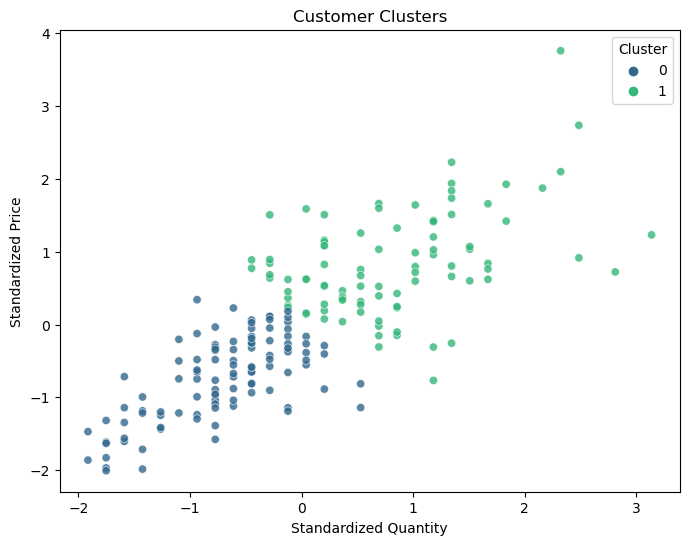

In [12]:
if __name__ == "__main__":
    
    data = load_and_merge_data('Transactions.csv', 'Customers.csv')
    selected_features = ['Quantity', 'Price']
    scaled_data = preprocess_data(data, selected_features)

    
    best_n_clusters, best_cluster_results = perform_clustering(scaled_data, min_clusters=2, max_clusters=10)

    
    data['Cluster'] = best_cluster_results['labels']

    
    print(f"Best Number of Clusters: {best_n_clusters}")
    print(f"Davies-Bouldin Index: {best_cluster_results['db_index']:.4f}")
    print(f"Silhouette Score: {best_cluster_results['silhouette_score']:.4f}")

    visualize_clusters(scaled_data, best_cluster_results['labels'])

    data.to_csv('Clustered_Customers.csv', index=False)